<a id="home"></a>

# Székely(földi)ek pályája

Ez a munkafüzet az [I. SZÉKELYDATA adatvizualizációs pályázat](http://csaladenes.egologo.ro/?p=1129) keretén belül publikált adatsort dolgozza fel, tisztítja, és készíti elő későbbi vizualizáláshoz, mely [ezen](https://lorinczszabolcs.github.io/eletpalya/) oldalon megtekinthető. 

Több lépésben végezzük az elemzést:

1. [Adatok feltérképezése és tisztítása](#1)
    1. [Születési helyek feldolgozása](#11)
    2. [Tanulmányi területek feldolgozása](#12)
    3. [Szakterületek feldolgozása](#13)
    4. [Lakhelyek feldolgozása](#14)
2. [Korreláció vizsgálata](#2)
    1. [születési hely - tanulmányok között](#21)
    2. [születési hely - szakterületek között](#22)
    3. [lakhely - tanulmányok között](#23)
    4. [lakhely - szakterületek között](#24)
3. [További adatelemzés](#3)
4. [Adatok előkészítése vizualizációhoz](#4)
</span>

##  0. Kezdeti beállítások, szükséges könyvtárak importálása

[Tetejére! &#8673;](#home)

In [379]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# unidecode - ékezetek eltűntetése
import unidecode

# stílus a megjelenítéshez
plt.style.use('ggplot')

## 1. Adatok feltérképezése és tisztítása <a id='1'></a>
[Tetejére! &#8673;](#home)

In [347]:
filename = 'data.json'
df = pd.read_json(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49220 entries, 0 to 49219
Data columns (total 19 columns):
birth           49220 non-null object
id              49220 non-null int64
livesin         43615 non-null object
marriedsince    4897 non-null object
marriedto       7986 non-null object
name            49220 non-null object
other1          8440 non-null object
other2          307 non-null object
other3          1 non-null object
other4          1 non-null object
other5          1 non-null object
other6          1 non-null object
school          133 non-null object
schoolyear      1487 non-null object
studwhat        3805 non-null object
studwhere       22175 non-null object
studyear        5473 non-null object
workwhat        9572 non-null object
workwhere       25718 non-null object
dtypes: int64(1), object(18)
memory usage: 7.1+ MB


Úgy tűnik elég **sok hiányzó adattal** van dolgunk. Ezeket majd a későbbiekben ki kell szűrjük.

### Tanulmányi terület, szakterület és lakhely feltérképezése
[Tetejére! &#8673;](#home)

Tanulmányi területek száma:  1781


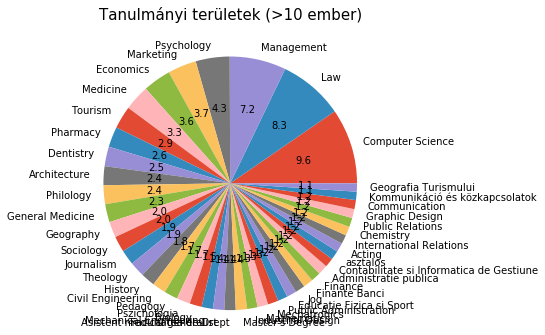

In [348]:
fig = plt.figure(figsize=(5,5));
stud_class=df['studwhat'].value_counts()
ax = stud_class[stud_class > 10].plot.pie(autopct='%.1f')
ax.axis('equal');
titledict = {'fontsize': 15, 'fontweight' : 100, 'verticalalignment': 'baseline', 'horizontalalignment': 'center'};
ax.set_title('Tanulmányi területek (>10 ember)', fontdict=titledict, y = 1.08);
ax.set_ylabel('');
print('Tanulmányi területek száma: ', df['studwhat'].value_counts().size)

Szakterületek száma:  4597


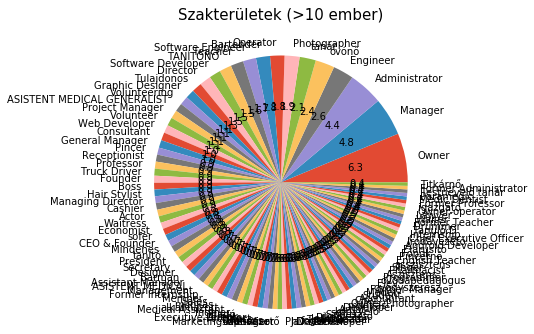

In [349]:
fig = plt.figure(figsize=(5,5));
work_class=df['workwhat'].value_counts()
ax = work_class[work_class > 10].plot.pie(autopct='%.1f')
ax.axis('equal');
titledict = {'fontsize': 15, 'fontweight' : 100, 'verticalalignment': 'baseline', 'horizontalalignment': 'center'};
ax.set_title('Szakterületek (>10 ember)', fontdict=titledict, y = 1.08);
ax.set_ylabel('');
print('Szakterületek száma: ', df['workwhat'].value_counts().size)

Lakhelyek száma:  3600


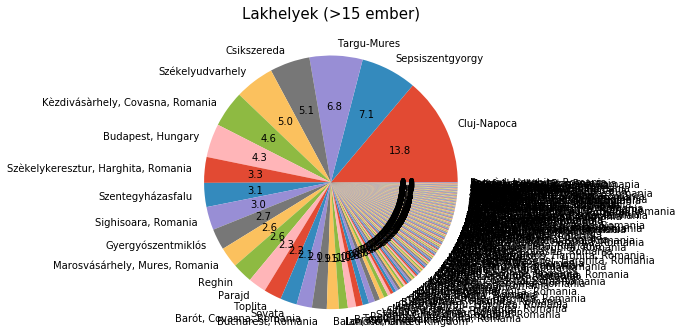

In [350]:
fig = plt.figure(figsize=(5,5));
live_class=df['livesin'].value_counts()
ax = live_class[live_class > 15].plot.pie(autopct='%.1f')
ax.axis('equal');
titledict = {'fontsize': 15, 'fontweight' : 100, 'verticalalignment': 'baseline', 'horizontalalignment': 'center'};
ax.set_title('Lakhelyek (>15 ember)', fontdict=titledict, y = 1.08);
ax.set_ylabel('');
print('Lakhelyek száma: ', df['livesin'].value_counts().size)

Átnevezzük a születési helyeket, majd **tisztítani és csoportosítani** kell a tanulmányi területeket, munkahelyeket, és lakhelyeket, mivel több nyelven, helyesírási hibával, vagy anélkül is szerepelnek adatok.

### 1.A. Születési helyek feldolgozása <a id="11"></a>
[Tetejére! &#8673;](#home)

- Születési helyek átnevezése

In [351]:
def birth(b):
    """
    Rename birth
    """
    
    if b == 'balan' : return 'Balánbánya'
    elif b == 'barot' : return 'Barót'
    elif b == 'csikszereda' : return 'Csíkszereda'
    elif b =='gyergyo' : return 'Gyergyó'
    elif b == 'keresztur' : return 'Székelykeresztúr'
    elif b == 'kezdi' : return 'Kézdivásárhely'
    elif b == 'kolozsvar' : return 'Kolozsvár'
    elif b == 'kovaszna' : return 'Kovászna'
    elif b == 'parajd' : return 'Parajd'
    elif b == 'regen' : return 'Szászrégen'
    elif b == 'segesvar' : return 'Segesvár'
    elif b == 'szentgyorgy' : return 'Szentgyörgy'
    elif b == 'szovata' : return 'Szováta'
    elif b == 'toplita' : return 'Maroshévíz'
    elif b == 'udvarhely' : return 'Székelyudvarhely'
    elif b == 'vasarhely' : return 'Marosvásárhely'
    elif b == 'vlahica' : return 'Szentegyháza'
    else : return b

In [352]:
df[['birth']] = df[['birth']].applymap(lambda x : birth(x))
print(df['birth'].value_counts())

Kolozsvár           3942
Kovászna            3915
Marosvásárhely      3823
Csíkszereda         3508
Szentgyörgy         3494
Gyergyó             3461
Kézdivásárhely      3384
Székelyudvarhely    3310
Székelykeresztúr    2830
Szászrégen          2770
Maroshévíz          2564
Segesvár            2539
Barót               2335
Szentegyháza        2329
Balánbánya          2312
Szováta             1522
Parajd              1182
Name: birth, dtype: int64


### 1.B. Tanulmányi területek feldolgozása <a id="12"></a>
[Tetejére! &#8673;](#home)

- ékezetek törlése
- helyesírási hibák kiszűrése
- nyelvtől független csoportosítás

In [353]:
df[['studwhat']] = df[['studwhat']].applymap(lambda x : str.lower(unidecode.unidecode(x)) if pd.notna(x) else np.nan)

In [354]:
def stud(s):
    """
    Categorises input field of study 's' into main categories.
    """
    
    # Mérnöki/Technológia
    if 'engineer' in s \
        or 'inginer' in s \
        or 'tcm' in s \
        or 'mernok' in s \
        or 'archite' in s \
        or 'a.c.' in s \
        or 'urbanism' in s \
        or 'industr' in s \
        or 'constructii' in s \
        or 'ccia' in s \
        or 'ing.' in s \
        or 'cepa' in s \
        or 'robot' in s \
        or 'instalatii' in s \
        or 'securitatea rutiera' in s \
        or 'upb' in s \
        or 'utc-n' in s \
        or 'automotive' in s \
        or 'mecha' in s \
        or 'cad' in s \
        or 'electro' in s \
        or 'hardware' in s \
        or 'mechanics' in s \
        or 'autovehicule rutiere' in s \
        or 'mecanica' in s \
        or 'mehanika' in s: return u'Mérnöki/Technológia'
    # Matematika/Informatika
    elif 'computer' in  s \
        or 'software' in s \
        or 'intelligent systems' in s \
        or 'szamitas' in s \
        or 'calculatoare' in s \
        or 'info' in s \
        or 'cig' in s \
        or 'database' in s \
        or 'mate' in s \
        or 'metematika' in s \
        or 'szoft' in s \
        or 'it' in s \
        or 'math' in s : return u'Matematika/Informatika'
    # Természettudományok
    elif 'biol' in  s \
        or 'geo' in s \
        or 'astronomy' in s \
        or 'okologia' in s \
        or 'kornyezettudomany' in s \
        or 'foldrajz' in s \
        or 'meteorology' in s \
        or 'meteorologia' in s \
        or 'chemistry' in s \
        or 'fizika' in s \
        or 'environmental science' in s \
        or 'stiinte ale naturi' in s \
        or 'topography' in s \
        or 'physics' in s \
        or 'chimie' in s \
        or 'kemia' in s \
        or 'natural science' in s : return u'Természettudományok'
    # Orvosi/Gyógyszerészet/Egészség
    elif 'medic' in  s \
        or 'nurs' in s \
        or 'pharmacy' in s \
        or 'etszk' in s \
        or 'pharmac' in s \
        or 'beteg' in s \
        or 'kineto' in s \
        or 'balneo' in s \
        or 'apolo' in  s\
        or 'egeszseg' in s \
        or 'dentistry' in s \
        or 'fogtechnika' in s \
        or 'health' in s \
        or 'fogasz' in s \
        or 'dent' in s \
        or 'aok' in s \
        or 'nutrition & dietetics' in s \
        or 'sykepleie bachelor' in s \
        or 'orvos' in s \
        or 'gyogy' in s \
        or 'kinetoterapie' in s : return u'Egészségügy'
    # Pénzügy/Management/Üzlet
    elif 'management' in  s \
        or 'marketing' in s \
        or 'finan' in s \
        or 'bussiness' in s \
        or 'kereskedelem' in s \
        or 'manag' in s \
        or 'konyvel' in s \
        or 'human resource' in s \
        or 'hr' in s \
        or 'business' in s \
        or 'contabilitate' in s \
        or 'administratie' in s \
        or 'fsega' in s \
        or 'acounting' in s \
        or 'bank' in s \
        or 'account' in s \
        or 'betriebswirtschaft' in s \
        or 'afaceri' in s : return u'Pénzügy/Management/Üzlet'
     # Társadalomtudományok
    elif 'sociology' in  s \
        or 'econom' in s \
        or 'social science' in s \
        or 'psycho' in s \
        or 'pszicho' in s \
        or 'psziho' in s \
        or 'psiho' in s \
        or 'mental' in s \
        or 'gazdalkodas' in s \
        or 'kozgazdasz' in s \
        or 'gazdasag' in s \
        or 'tarsadalmi' in s \
        or 'law' in  s\
        or 'cultural' in s \
        or 'juridice' in s \
        or 'tortenelem' in s \
        or 'jog' in s \
        or 'drept' in s \
        or 'ecology' in s \
        or 'touris' in s \
        or 'social' in s \
        or 'turis' in s \
        or 'turiz' in s \
        or 'international relations' in  s \
        or 'nemzetkozi kapcsolatok' in s \
        or 'african studies' in s \
        or 'politic' in s \
        or 'kozigazgatas' in s \
        or 'archaeology' in s \
        or 'public administration' in s \
        or 'r.i.s.e' in s \
        or 'studii europene' in s \
        or 'nemzetkozi tanulmanyok' in s \
        or 'european studies' in s \
        or 'polito' in s \
        or 'public policy' in s \
        or 'socio' in s \
        or 'szocio' in s : return u'Társadalomtudományok'
    # Oktatás
    elif 'peda' in  s \
        or 'teaching' in s \
        or 'tanar' in s \
        or 'andragog' in s \
        or 'alternativ modszerek az ovodaban es az elemi osztalyokban' in s \
        or 'neveles' in s \
        or 'd.p.p.d' in s \
        or 'stiinte ale educatiei' in s \
        or 'educatie fizica' in s \
        or 'ed.fiz' in s \
        or 'bodybuilding' in s \
        or 'physical' in s \
        or 'volei' in s \
        or 'testnevel' in s \
        or 'education' in s : return u'Oktatás'
    # Művészetek
    elif 'photography' in  s \
        or 'photo' in s \
        or 'acting' in s \
        or 'operator' in s \
        or 'saxophone' in s \
        or 'graphics' in s \
        or 'art' in s \
        or 'canto popular' in s \
        or 'actor' in s \
        or 'muveszet' in s \
        or 'choreography' in s \
        or 'painting' in s \
        or 'music' in s \
        or 'desiner' in s \
        or 'szobraszat' in s \
        or 'puppery' in s \
        or 'muzica' in s \
        or 'piano' in s \
        or 'violin' in s \
        or 'sing' in s \
        or 'zene' in s \
        or 'drama' in s \
        or 'bass' in s \
        or 'szinesz' in s \
        or 'percussion' in s \
        or 'puppetry' in s \
        or 'dance' in s \
        or 'sculpture' in s \
        or 'szinmuvesz' in s \
        or 'kameraman' in s \
        or 'enek' in s : return u'Művészetek'
    # Média/Kommunikáció
    elif 'journalism' in  s\
        or 'ujsag' in s \
        or 'design' in s \
        or 'advertising' in s \
        or 'com' in s \
        or 'film' in s \
        or 'public relations' in s \
        or 'pr' in s \
        or 'newspaper' in s \
        or 'media' in s \
        or 'komm' in s : return u'Média/Kommunikáció'
    # Humán tárgyak
    elif 'roman' in s \
        or 'engleza' in s \
        or 'english' in s \
        or 'german' in s \
        or 'literature' in s \
        or 'translation' in s \
        or 'angol' in s \
        or 'language' in s \
        or 'limbi' in s \
        or 'hungarian' in s \
        or 'linguistics' in s \
        or 'japanese' in s \
        or 'bolcsesz' in s \
        or 'magyar' in s \
        or 'aesthetics' in s \
        or 'deutsch' in s \
        or 'french' in s \
        or 'history'in s \
        or 'philosophy' in s \
        or 'bolcseszkar' in s \
        or 'filozofia' in s \
        or 'katolikus' in s \
        or 'phylosophy' in s \
        or 'philology' in s \
        or 'filologia' in s \
        or 'filozofie' in s \
        or 'religi' in s \
        or 'missions & evangelism' in s \
        or 'theology' in s \
        or 'vallas' in s : return u'Humán tárgyak'
    # Szakma/Alkalmazott tudományok
    elif 'asztalos' in s \
        or 'hivatasos' in s \
        or 'ospatar' in s \
        or 'auto electrician' in s \
        or 'pincer' in s \
        or 'agriculture' in s \
        or 'vezetes es szervezes' in s \
        or 'szakacs' in s \
        or 'foci' in s \
        or 'kozmetikus' in s \
        or 'hairdressing' in s \
        or 'coafura' in s \
        or 'kozmetika' in s \
        or 'optometry' in s \
        or 'fodrasz' in s \
        or 'sport' in s \
        or 'cosmetology' in s \
        or 'lacatus' in s \
        or 'lacatuserie' in s \
        or 'lakatos' in s \
        or 'gepesz' in s \
        or 'autoszerelo' in s \
        or 'agro' in s \
        or 'horticulture' in s \
        or 'silvicultura' in s \
        or 'silviculture' in s \
        or 'faipar' in s \
        or 'optometria' in s : return u'Alkalmazott tudományok'
    else : return s

Tanulmányi területek száma:  11


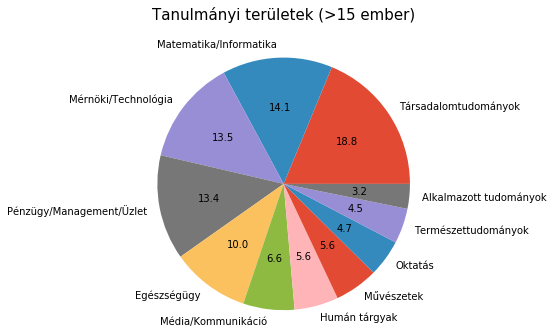

In [355]:
fig = plt.figure(figsize=(5,5));
df[['studwhat']] = df[['studwhat']].applymap(lambda x : stud(x) if pd.notna(x) else np.nan)
stud_class=df['studwhat'].value_counts()
ax = stud_class[stud_class > 15].plot.pie(autopct='%.1f')
ax.axis('equal');
titledict = {'fontsize': 15, 'fontweight' : 100, 'verticalalignment': 'baseline', 'horizontalalignment': 'center'};
ax.set_title('Tanulmányi területek (>15 ember)', fontdict=titledict, y = 1.08);
ax.set_ylabel('');
print('Tanulmányi területek száma: ', stud_class[stud_class > 15].value_counts().size)

### 1.C. Szakterületek feldolgozása <a id="13"></a>
[Tetejére! &#8673;](#home)
- ékezetek törlése
- helyesírási hibák kiszűrése
- nyelvtől független csoportosítás

In [356]:
df[['workwhat']] = df[['workwhat']].applymap(lambda x : str.lower(unidecode.unidecode(x)) if pd.notna(x) else np.nan)

In [357]:
df['workwhat'].value_counts()

owner                                                                 154
manager                                                               119
administrator                                                         108
engineer                                                               65
ovono                                                                  65
tanar                                                                  55
tanitono                                                               49
operator                                                               47
photographer                                                           47
bartender                                                              44
software engineer                                                      41
teacher                                                                40
software developer                                                     36
director                              

In [358]:
def work(w):
    """
    Categorises input work 'w' into main categories.
    """
    # Programmer
    if 'software' in w \
        or 'developer' in w \
        or 'informa' in w \
        or 'asm' in w \
        or 'sysop' in w \
        or 'it compliance' in w \
        or 'programmer' in w \
        or 'web' in w : return u'Informatikus'
    elif 'tanitono' in w \
        or 'tanar' in w \
        or 'ovono' in w \
        or 'teacher' in w \
        or 'dirigente' in w \
        or 'pedagog' in w \
        or 'student' in w \
        or 'tanulo' in w \
        or 'invatatoare' in w \
        or 'tanito' in w \
        or 'sudent' in w \
        or 'elev' in w \
        or 'muvelodesszervezo' in w \
        or 'oktato' in w \
        or 'teaching' in w \
        or 'study' in w \
        or 'diak' in w \
        or 'ovoneni' in w \
        or 'profesor' in w \
        or 'lecturer' in w \
        or 'instructor' in w \
        or 'university' in w \
        or 'adjunktus' in w \
        or 'educatoare' in w \
        or 'researcher' in w \
        or 'professor' in w : return 'Oktatás'
    elif 'sofer' in w \
        or 'driver' in w \
        or 'curier' in w \
        or 'posta' in w \
        or 'gepkocsivezeto' in w \
        or 'raktar' in w \
        or w == 'vezeto' \
        or 'komissio' in w \
        or 'messenger' in w \
        or 'komisszio' in w \
        or 'comission' in w \
        or 'fahrer' in w \
        or 'transport' in w \
        or 'rider' in w \
        or 'sofor' in w : return 'Logisztika'
    elif 'volunteer' in w \
        or 'au pair' in w \
        or 'voluntar' in w \
        or 'social work' in w \
        or 'onkentes' in w : return 'Önkéntes'
    elif 'tancos' in w \
        or 'szinesz' in w \
        or 'enekes' in w \
        or 'drummer' in w \
        or 'artist' in w \
        or 'dj' in w \
        or 'music' in w \
        or 'guitar' in w \
        or 'muvesz' in w \
        or 'musician' in w \
        or 'bassist' in w \
        or 'zenesz' in w \
        or 'karmester' in w \
        or 'actress' in w \
        or 'animator' in w \
        or 'actor' in w \
        or 'dance' in w \
        or 'grafik' in w \
        or 'sing' in w \
        or 'actor' in w : return 'Művész'
    elif 'sales' in w \
        or 'consultant' in w \
        or 'uzlet' in w \
        or 'marketing' in w \
        or 'cashier' in w \
        or 'casier' in w \
        or 'ugynok' in w \
        or 'agent' in w \
        or 'broker' in w \
        or 'vanzari' in w \
        or 'vanzato' in w \
        or 'elado' in w : return 'Eladás'
    elif 'bartender' in w \
        or 'waitress' in w \
        or 'pultos' in w \
        or 'pincer' in w \
        or 'reception' in w \
        or 'kiszolgalo' in w \
        or 'ospatar' in w \
        or 'barista' in w \
        or 'bucatar' in w \
        or 'waiter' in w \
        or 'waiting staff' in w \
        or 'baros' in w \
        or 'cukrasz' in w \
        or 'sef' in w \
        or 'szakacs' in w \
        or 'chef' in w \
        or 'barman' in w \
        or 'pincer' in w : return 'Vendéglátás'
    elif 'asistent' in w \
        or 'orvos' in w \
        or 'aszisztens' in w \
        or 'gyogyszer' in w \
        or 'psiholog' in w \
        or 'health' in w \
        or 'apolo' in w \
        or 'veterinarian' in w \
        or 'kranken' in w \
        or 'assistenz' in w \
        or 'nurse' in w \
        or 'assziszt' in w \
        or 'orthodontist' in w \
        or 'dietitian' in w \
        or 'physician' in w \
        or 'dr.' in w \
        or 'rezidens' in w \
        or 'kineto' in w \
        or 'dentist' in w \
        or 'pszicho' in w \
        or 'rezident' in w \
        or 'doctor' in w \
        or 'pharma' in w \
        or 'optometrista' in w \
        or 'farmac' in w \
        or 'medic' in w : return 'Egészségügy'
    elif 'kozmetik' in w \
        or 'fodrasz' in w \
        or 'kormos' in w \
        or 'manichiur' in w \
        or 'coaf' in w \
        or 'hair' in w : return 'Kozmetika/Fodrász'
    elif 'train' in w \
        or 'torna' in w \
        or 'versenyzo' in w \
        or 'jucator' in w \
        or 'forward' in w \
        or 'vego' in w \
        or 'beallo' in w \
        or 'kozeppalyas' in w \
        or 'jatekos' in w \
        or 'coach' in w \
        or 'striker' in  w \
        or 'arbitru' in w \
        or 'midfielder' in w \
        or 'sport' in w \
        or 'captain' in w \
        or 'player' in w \
        or 'fotbal' in w \
        or 'atacant' in w \
        or 'csatar' in w \
        or 'goalkeeper' in w \
        or 'fitness' in w \
        or 'antrenor' in w : return 'Sport'
    elif 'secretary' in w \
        or 'alkalmazott' in w \
        or 'iroda' in w \
        or 'oordinator' in w \
        or 'economist' in w \
        or 'titkarno' in w \
        or 'coordonator' in w \
        or 'public relations' in w \
        or 'contabil' in w \
        or 'konyvtaros' in w \
        or 'kozgazdasz' in w \
        or 'referens' in w \
        or 'secretara' in w \
        or 'technical support' in w \
        or 'dispecer' in w \
        or 'titkar' in w \
        or 'inspector' in w \
        or 'referent' in w \
        or 'partner' in w \
        or 'employee' in w \
        or 'accountant' in w \
        or 'konyvelo' in w : return 'Irodai alkalmazott' 
    elif 'engineer' in w \
        or 'inginer' in w \
        or 'mernok' in w \
        or 'epitesz' in w \
        or 'constructor' in w \
        or 'arhitect' in w \
        or 'architect' in w \
        or 'arhchitect' in w \
        or 'autocad' in w : return 'Mérnök'
    elif 'polgarmester' in w \
        or 'president' in w \
        or 'tanacsos' in w \
        or 'orsvezeto' in w \
        or 'presedinte' in w : return 'Közalkalmazott'
    elif 'photo' in w \
        or 'media' in w \
        or 'designer' in w \
        or 'operator' in w \
        or 'foto' in w \
        or 'writer' in w \
        or 'model' in w \
        or 'musorvezeto' in w \
        or 'press' in w \
        or 'reporter' in w \
        or 'editor' in w \
        or 'szerkeszto' in w \
        or 'ujsagiro' in w \
        or 'producer' in w \
        or 'blogger' in w \
        or 'journalist' in w \
        or 'martketing' in w : return 'Média'
    elif 'lawyer' in w \
        or 'ugyved' in w \
        or 'juridic' in w \
        or 'avocat' in w : return 'Jogi'
    elif 'varrono' in w \
        or 'munkas' in w \
        or 'muncitor' in w \
        or 'electrician' in w \
        or 'villanyszerelo' in w \
        or 'trabajador' in w \
        or 'kazan' in w \
        or 'worker' in w \
        or 'mindenes' in w \
        or 'kasszas' in w \
        or 'gepkezelo' in w \
        or 'flight attendant' in w \
        or 'lucrator comercial' in w \
        or 'szerelo' in w \
        or 'baker' in w \
        or 'muncitoare' in w \
        or 'cabin crew' in w \
        or 'elarusito' in w \
        or 'technician' in w \
        or 'pilot' in w \
        or 'masszor' in w \
        or 'pastor' in w \
        or 'mechanic' in w \
        or 'firefighter' in w \
        or 'mecanic' in w \
        or 'hegeszto' in w \
        or 'fafarago' in w \
        or 'asztalos' in w : return 'Szakmunkás'
    elif 'boss' in w \
        or 'owner' in w \
        or 'manager' in w \
        or 'ugyvezeto' in w \
        or 'manager' in w \
        or 'admin' in w \
        or 'igazgato' in w \
        or 'vallalkozo' in w \
        or 'presedinte' in w \
        or 'masseur' in w \
        or 'chief' in w \
        or 'president' in w \
        or 'cegvezeto' in w \
        or 'leader' in w \
        or 'ceo' in w \
        or 'presedinte' in w \
        or 'supervisor' in w \
        or 'director' in w \
        or 'tulajdonos' in w \
        or 'menedzser' in w \
        or 'elnok' in w \
        or 'fonok' in w \
        or 'management' in w \
        or 'founder' in w : return 'Tulajdonos/Manager'
    elif 'pap' in w \
        or 'popa' in w \
        or 'lelkesz' in w \
        or 'priest' in w \
        or 'kantor' in w \
        or 'lelkipasztor' in w : return 'Egyház'
    else: return np.nan

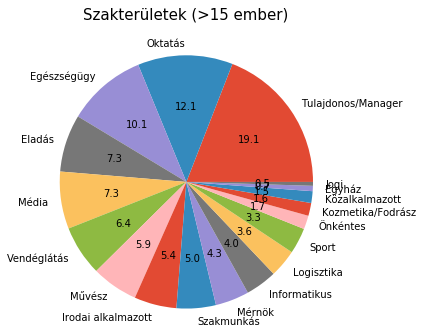

In [359]:
fig = plt.figure(figsize=(5,5));
df[['workwhat']] = df[['workwhat']].applymap(lambda x : work(x) if pd.notna(x) else np.nan)
work_class=df['workwhat'].value_counts()
ax = work_class[work_class > 15].plot.pie(autopct='%.1f')
ax.axis('equal');
titledict = {'fontsize': 15, 'fontweight' : 100, 'verticalalignment': 'baseline', 'horizontalalignment': 'center'};
ax.set_title('Szakterületek (>15 ember)', fontdict=titledict, y = 1.08);
ax.set_ylabel('');

### 1.D. Lakhelyek feldolgozása <a id="14"></a>
[Tetejére! &#8673;](#home)
- ékezetek törlése
- helyesírási hibák kiszűrése
- nyelvtől független csoportosítás

In [360]:
df[['livesin']] = df[['livesin']].applymap(lambda x : str.lower(unidecode.unidecode(x)) if pd.notna(x) else np.nan)

In [361]:
df['livesin'].value_counts()

cluj-napoca                              5000
sepsiszentgyorgy                         2575
targu-mures                              2442
csikszereda                              1846
szekelyudvarhely                         1818
kezdivasarhely, covasna, romania         1679
budapest, hungary                        1548
szekelykeresztur, harghita, romania      1186
szentegyhazasfalu                        1106
sighisoara, romania                      1069
gyergyoszentmiklos                        973
marosvasarhely, mures, romania            944
reghin                                    933
parajd                                    831
toplita                                   810
sovata                                    767
barot, covasna, romania                   709
bucharest, romania                        681
balan, romania                            556
london, united kingdom                    408
brasov, romania                           378
toplita-ciuc, harghita, romania   

In [362]:
def lives(l) :
    if 'miercurea-ciuc' in l \
        or 'miercurea ciuc' in l \
        or 'csikszereda' in l : return 'Csíkszereda'
    elif 'szekelyudvarhely' in l \
        or 'odorheiul secuiesc' in l \
        or 'odorheiu secuiesc' in l: return 'Székelyudvarhely'
    elif 'gheorgheni' in l \
        or 'gyergyo' in l : return 'Gyergyó'
    elif 'targu-mures' in l \
        or 'tirgu-mures' in l \
        or 'marosvasarhely' in l : return 'Marosvásárhely'
    elif 'sepsiszentgyorgy' in l \
        or 'sfantu-gheorghe' in l \
        or 'sfantu gheorghe' in l : return 'Sepsiszentgyörgy'
    elif 'sighisoara' in l \
        or 'segesvar' in l : return 'Segesvár'
    elif 'cluj-napoca' in l \
        or 'kolozsvar' in l :return 'Kolozsvár'
    elif 'kezdivasarhely' in l \
        or 'targu secuiesc' in l : return 'Kézdivásárhely'
    elif 'oradea' in l \
        or 'nagyvarad' in l : return 'Nagyvárad'
    elif 'timisoara' in l \
        or 'temesvar' in l : return 'Temesvár'
    elif 'brasov' in l \
        or 'brasso' in l : return 'Brassó'
    elif 'bucharest' in l \
        or 'bukarest' in l \
        or 'bucuresti' in l : return 'Bukarest'
    elif 'budapest' in l : return 'Budapest'
    elif 'reghin' in l \
        or 'regen' in l : return 'Szászrégen'
    elif 'keresztur' in l \
        or 'cristuru' in l : return 'Székelykeresztúr'
    elif 'toplita' in l \
        or 'toplica' in l : return 'Toplița'
    elif 'szentegyhaza' in l \
        or 'vlahita' in l : return 'Szentegyházasfalu'
    elif 'london' in l : return 'London'
    elif 'sovata' in l \
        or 'szovata' in l : return 'Szováta'
    elif 'barot' in l \
        or 'baraolt' in l : return 'Barót'
    elif 'balan' in l : return 'Balánbánya'
    elif 'parajd' in l \
        or 'praid' in l : return 'Parajd'
    elif 'arad' in l : return 'Arad'
    elif 'vienna' in l \
        or 'becs' in l : return 'Bécs'   
    elif 'dublin' in l : return 'Dublin'
    elif 'tusnad' in l : return 'Tusnád'
    elif 'sibiu' in l \
        or 'szeben' in l : return 'Nagyszeben'
    elif 'gyulafehervar' in l \
        or 'alba iulia' in l : return 'Gyulafehérvár'
    elif 'iasi' in l \
        or 'jaszvasar' in l : return 'Jászvásár'
    elif 'munich' in l \
        or 'munchen' in l : return 'München'
    elif 'roma' in l \
        or 'rome' in l : return 'Róma'
    elif 'new york' in l : return 'New York'
    elif 'turia' in l \
        or 'torja' in l : return 'Torja'
    elif 'berlin' in l : return 'Berlin'
    elif 'debrecen' in l : return 'Debrecen'
    elif 'sopron' in l : return 'Sopron'
    elif 'szeged' in l : return 'Szeged'
    elif 'ozsdola' in l \
        or 'ojdula' in l : return 'Ozsdola'
    elif 'dumbraveni' in l : return 'Dumbrăveni'
    elif 'vecses' in l : return 'Vecsés'
    elif 'kaposvar' in l : return 'Kaposvár'
    elif 'mosonmagyarovar' in l : return 'Mosonmagyaróvár'
    elif 'eger' in l : return 'Eger'
    elif 'gelence' in l \
        or 'ghelinta' in l : return 'Gelence'
    elif 'borsec' in l \
        or 'borszek' in l : return 'Borszék'
    elif 'galati' in l \
        or 'galac' in l : return 'Galați'
    elif 'deva' in l : return 'Déva'
    elif 'lajosmizse' in l : return 'Lajosmizse'
    elif 'erd' in l : return 'Érd'
    elif 'toronto' in l : return 'Toronto'
    elif 'veszprem' in l : return 'Veszprém'
    elif 'cologne' in l \
        or 'koln' in l : return 'Köln'
    elif 'pusztavam' in l : return 'Pusztavám'
    elif 'intorsura buzaului' in l \
        or 'bodzafordulo' in l : return 'Bodzaforduló'
    elif 'bistrita' in l \
        or 'beszterce' in l : return 'Beszterce'
    elif 'tarnaveni' in l \
        or 'dicsoszentmarton' in l : return 'Târnăveni'
    elif 'lazarea' in l \
        or 'szarhegy' in l : return 'Szárhegy'
    elif 'kolding' in l : return 'Kolding'
    elif 'passau' in l : return 'Passau'
    elif 'ingolstadt' in l : return 'Ingolstadt'
    elif l == 'covasna' \
        or l == 'kovaszna' : return 'Kovászna'
    elif 'satu mare' in l \
        or 'szatmar' in l : return 'Szatmár'
    elif 'atlanta' in l : return 'Atlanta'
    elif 'pecs' in l : return 'Pécs'
    elif 'korinth' in l : return 'Korinth'
    elif 'kerepes' in l : return 'Kerepes'
    elif 'nyiregyhaza' in l : return 'Nyíregyháza'
    elif 'gidofalva' in l \
        or 'ghidfalau' in l : return 'Gidófalva'
    elif 'piatra neamt' in l : return 'Piatra Neamț'
    else: return l

Lakhelyek száma:  24


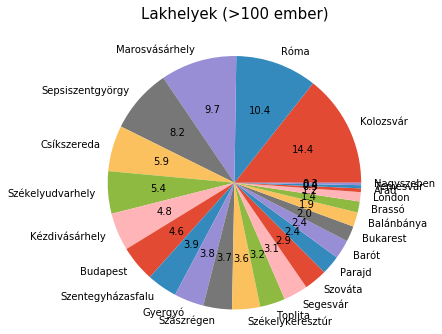

In [363]:
fig = plt.figure(figsize=(5,5));
df[['livesin']] = df[['livesin']].applymap(lambda x : lives(x) if pd.notna(x) else np.nan)
live_class=df['livesin'].value_counts()
ax = live_class[live_class > 100].plot.pie(autopct='%.1f')
ax.axis('equal');
titledict = {'fontsize': 15, 'fontweight' : 100, 'verticalalignment': 'baseline', 'horizontalalignment': 'center'};
ax.set_title('Lakhelyek (>100 ember)', fontdict=titledict, y = 1.08);
ax.set_ylabel('');
print('Lakhelyek száma: ', live_class[live_class > 100].size)

## 2. Korreláció vizsgálata <a id="2"></a>
[Tetejére! &#8673;](#home)

### 2.a. Korreláció vizsgálata születési hely és tanulmányok között <a id="21"></a>
[Tetejére! &#8673;](#home)

Előbb kiválasztjuk a megfelelő oszlopokat, majd töröljük az összes olyan mérést, mely nincs kitöltve(NaN), valamint töröljük az ékezeteket és kisbetűsre alakítjuk a DataFrame tartalmát, hogy könnyebb legyen később a feldolgozás.

In [364]:
df_birth_stud=df.loc[:, ['birth', 'studwhat']].copy()
df_birth_stud.dropna(inplace=True)
df_birth_stud = df_birth_stud.groupby('studwhat').filter(lambda x : len (x) >= 15)

In [365]:
heatmap = pd.crosstab(df_birth_stud.birth, df_birth_stud.studwhat)

A lenti hőtérképről könnyen leolvasható, hogy egyes városokban született emberek esetén mely tanulmányi területek a legnépszerűbbek.

**További elemzés a [weboldalon](https://lorinczszabolcs.github.io/eletpalya/).**

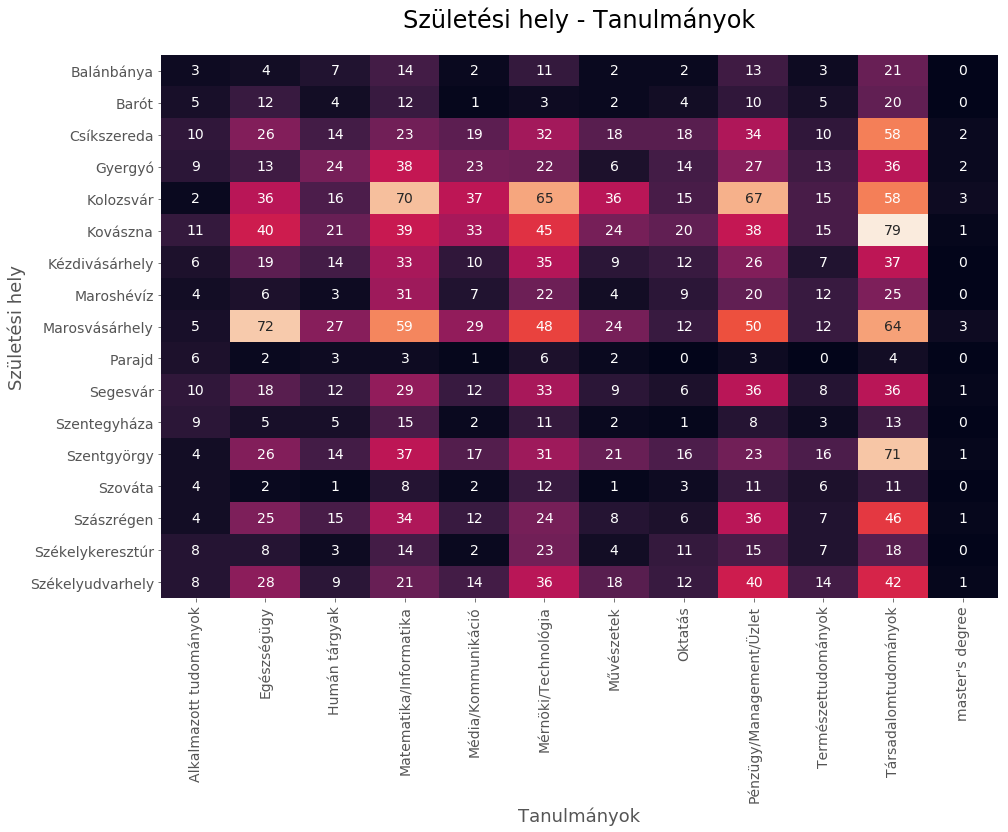

In [366]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(heatmap, annot=True, cbar=False, fmt='g', annot_kws={"size": 14})
ax.set_title('Születési hely - Tanulmányok', fontsize=24, y = 1.04);
ax.set_xlabel('Tanulmányok', fontsize=18);
ax.set_ylabel('Születési hely', fontsize=18);
plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=14);
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=14);

### 2.b. Korreláció vizsgálata születési hely és szakterületek között <a id="22"></a>
[Tetejére! &#8673;](#home)

In [367]:
df_birth_work=df.loc[:, ['birth', 'workwhat']].copy()
df_birth_work.dropna(inplace=True)
df_birth_work = df_birth_work.groupby('workwhat').filter(lambda x : len (x) >= 10)

In [368]:
heatmap2 = pd.crosstab(df_birth_work.birth, df_birth_work.workwhat)
heatmap2_norm_col=(heatmap2-heatmap2.mean())/heatmap2.std()

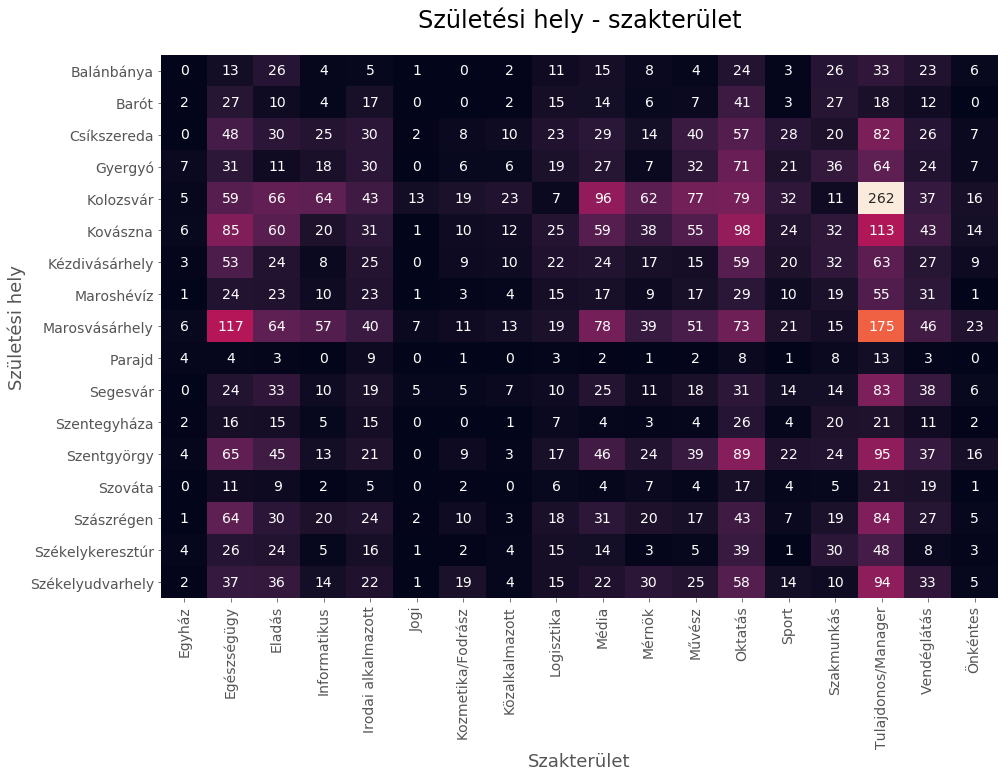

In [369]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(heatmap2, annot=True, cbar=False, fmt='g', annot_kws={"size": 14})
ax.set_title('Születési hely - szakterület', fontsize = 24, y=1.04)
ax.set_xlabel('Szakterület', fontsize=18);
ax.set_ylabel('Születési hely', fontsize=18);
plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=14);
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=14);

Normalizálva oszlop szerint, mert a manager miatt a többi nem szembetűnő.

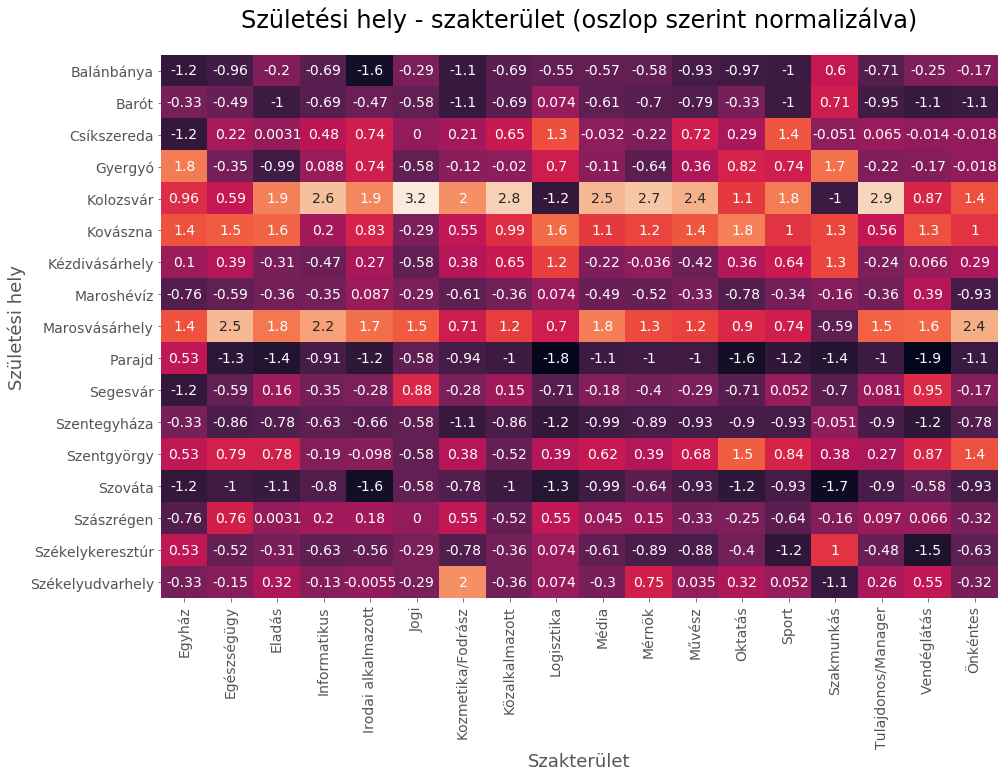

In [370]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(heatmap2_norm_col, annot=True, cbar=False, annot_kws={"size": 14})
ax.set_title('Születési hely - szakterület (oszlop szerint normalizálva)', fontsize = 24, y = 1.04)
ax.set_xlabel('Szakterület', fontsize=18);
ax.set_ylabel('Születési hely', fontsize=18);
plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=14);
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=14);

### 2.c. Korreláció vizsgálata lakhely és tanulmányok között <a id="23"></a>
[Tetejére! &#8673;](#home)

In [371]:
df_live_stud=df.loc[:, ['livesin', 'studwhat']].copy()
df_live_stud.dropna(inplace=True)
df_live_stud = df_live_stud.groupby('studwhat').filter(lambda x : len (x) >= 15)
df_live_stud = df_live_stud.groupby('livesin').filter(lambda x : len (x) >= 10)

In [372]:
heatmap3 = pd.crosstab(df_live_stud.livesin, df_live_stud.studwhat)
heatmap3_norm_row=heatmap3.sub(heatmap3.mean(axis=1), axis=0)
heatmap3_norm_row = heatmap3_norm_row.div(heatmap3.std(axis=1), axis=0 )

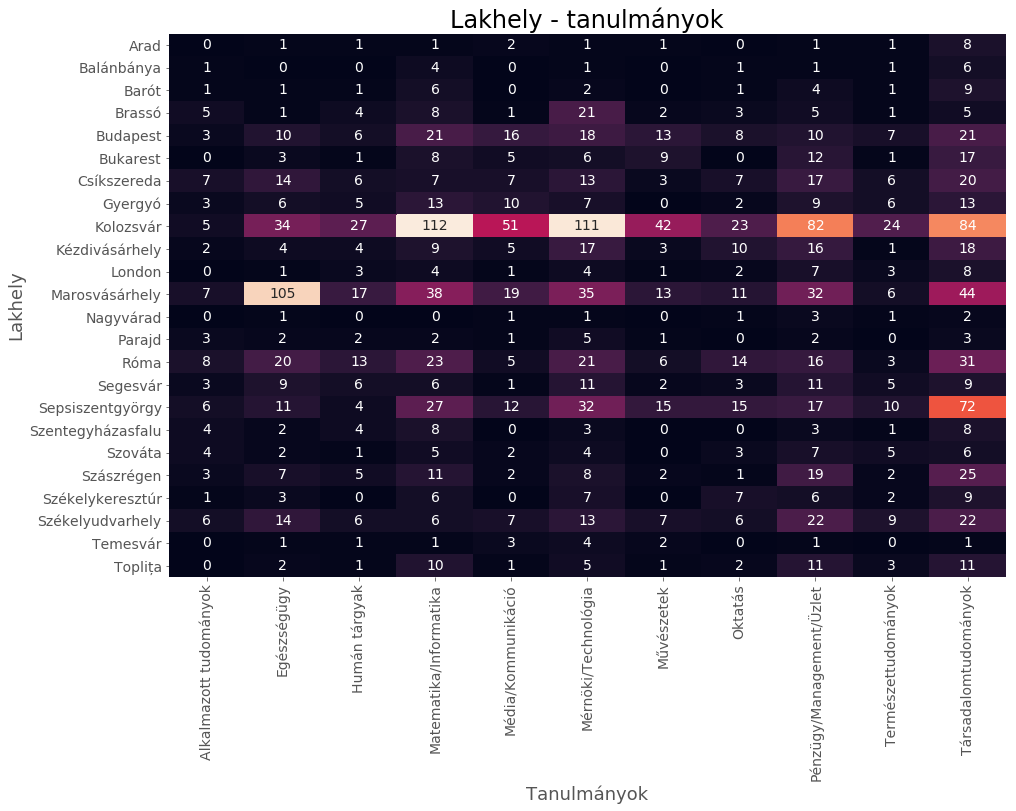

In [373]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(heatmap3, annot=True, cbar=False, fmt='g', annot_kws={"size": 14})
ax.set_title('Lakhely - tanulmányok', fontsize = 24)
ax.set_xlabel('Tanulmányok', fontsize=18);
ax.set_ylabel('Lakhely', fontsize=18);
plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=14);
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=14);

Normalizálva sor zerint, mert Kolozsvár miatt a többi adat elenyészik.

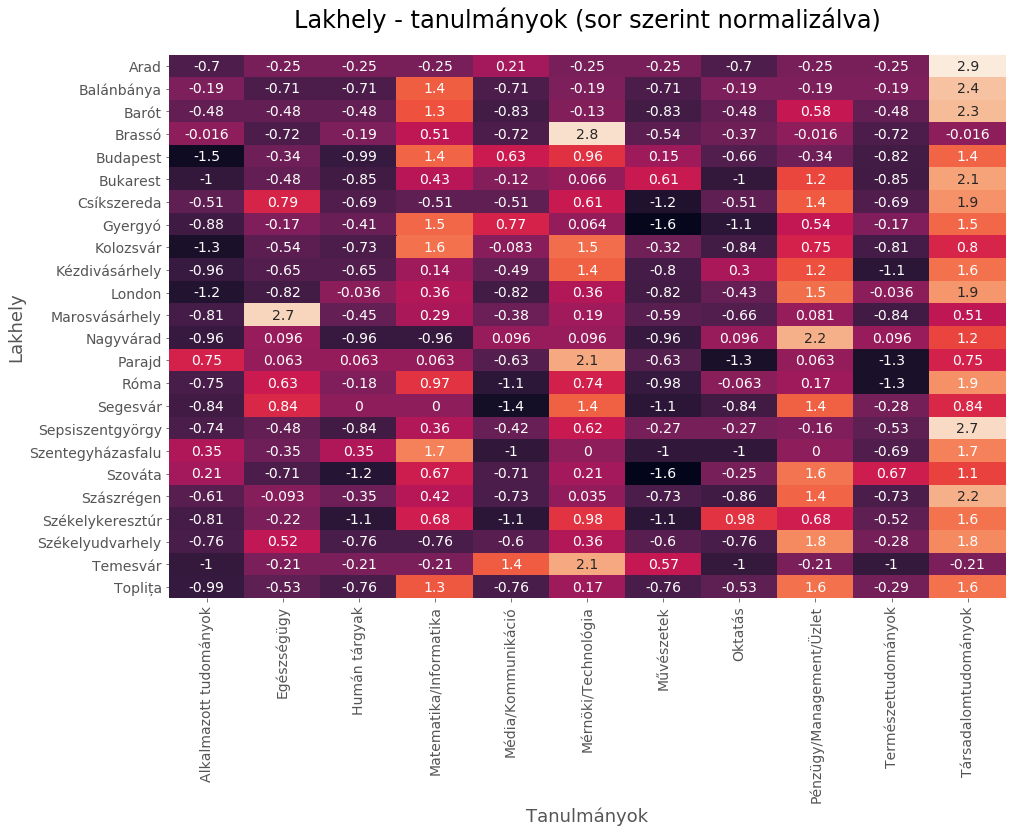

In [374]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(heatmap3_norm_row, annot=True, cbar=False, annot_kws={"size": 14})
ax.set_title('Lakhely - tanulmányok (sor szerint normalizálva)', fontsize=24, y=1.04)
ax.set_xlabel('Tanulmányok', fontsize=18);
ax.set_ylabel('Lakhely', fontsize=18);
plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=14);
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=14);

### 2.d. Korreláció vizsgálata lakhely és munkahely között <a id="24"></a>

[Tetejére! &#8673;](#home)

In [375]:
df_live_work=df.loc[:, ['livesin', 'workwhat']].copy()
df_live_work.dropna(inplace=True)
df_live_work = df_live_work.groupby('livesin').filter(lambda x : len (x) >= 10)
df_live_work = df_live_work.groupby('workwhat').filter(lambda x : len (x) >= 10)

In [376]:
heatmap4 = pd.crosstab(df_live_work.livesin, df_live_work.workwhat)
heatmap4_norm_row=heatmap4.sub(heatmap4.mean(axis=1), axis=0)
heatmap4_norm_row = heatmap4_norm_row.div(heatmap4.std(axis=1), axis=0 )

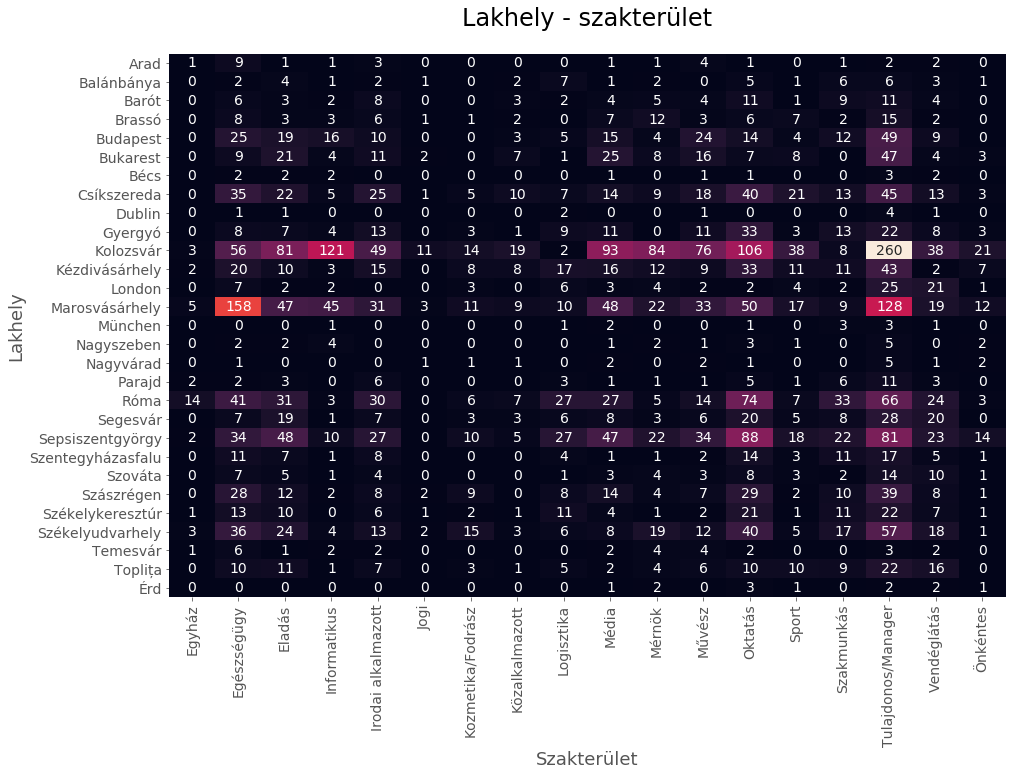

In [377]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(heatmap4, annot=True, cbar=False, fmt='g', annot_kws={"size": 14})
ax.set_title('Lakhely - szakterület', fontsize = 24, y=1.04)
ax.set_xlabel('Szakterület', fontsize=18);
ax.set_ylabel('Lakhely', fontsize=18);
plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=14);
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=14);

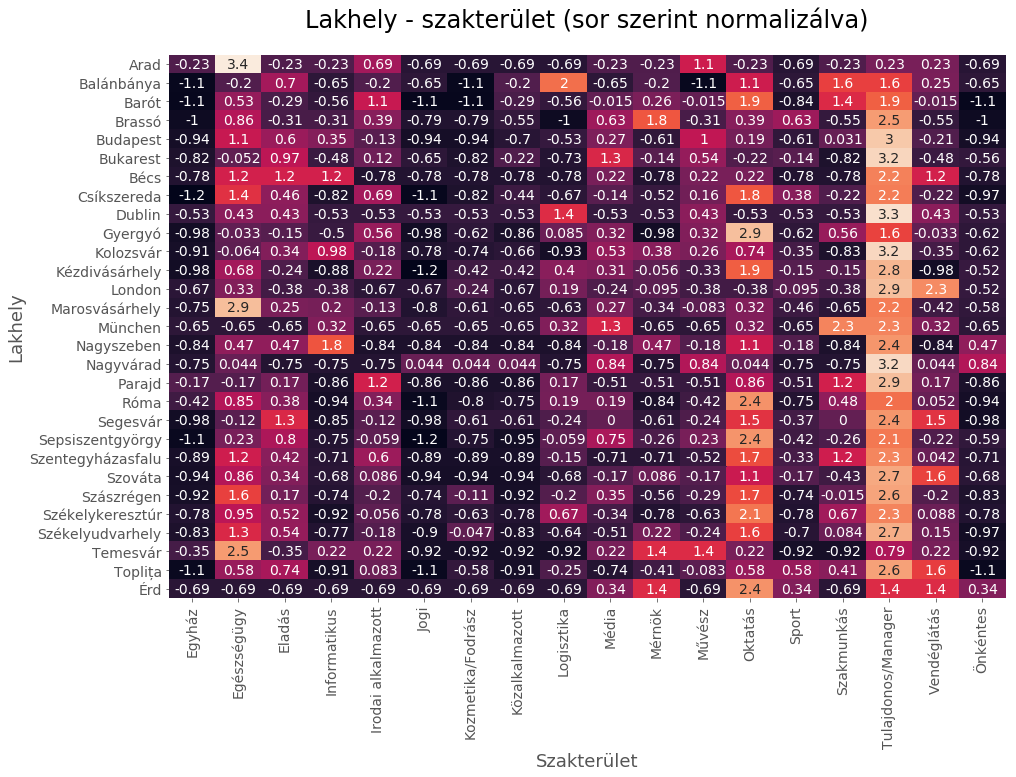

In [378]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(heatmap4_norm_row, annot=True, cbar=False, annot_kws={"size": 14})
ax.set_title('Lakhely - szakterület (sor szerint normalizálva)', fontsize = 24, y=1.04)
ax.set_xlabel('Szakterület', fontsize=18);
ax.set_ylabel('Lakhely', fontsize=18);
plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=14);
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=14);